In [96]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tristanzhang32/ai-generated-images-vs-real-images")

print("Path to dataset files:", path)

c:\Users\embra\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\embra\.cache\kagglehub\datasets\tristanzhang32\ai-generated-images-vs-real-images\versions\2


In [84]:
print(path)

C:\Users\embra\.cache\kagglehub\datasets\tristanzhang32\ai-generated-images-vs-real-images\versions\2


In [55]:
os.listdir(path)

['test', 'train']

In [56]:
len(os.listdir(os.path.join(path, "test", "real")))
for f in os.listdir(os.path.join(path, "test", "real")):
    if not f.endswith(".jpg"):
        print(f)

In [62]:
folder = os.listdir(os.path.join(path, "test", "fake"))
len(folder)

files=[f for f in folder if not f.endswith((".jpg"))]
len(files)
print(files)

['0572.png', '0573.png', '0574.png', '0575.png', '0576.png', '0577.png', '0578.png', '0579.png', '0580.png', '0581.png', '0582.png', '0583.png', '0584.png', '0585.png', '0586.png', '0587.png', '0588.png', '0589.png', '0590.png', '0591.png', '0592.png', '0593.png', '0594.png', '0595.png', '0596.png', '0597.png', '0598.png', '0599.png', '0600.png', '0601.png', '0602.png', '0603.png', '0604.png', '0605.png', '0606.png', '0607.png', '0608.png', '0609.png', '0610.png', '0611.png', '0612.png', '0613.png', '0614.png', '0615.png', '0616.png', '0617.png', '0618.png', '0619.png', '0620.png', '0621.png', '0622.png', '0623.png', '0624.png', '0625.png', '0626.png', '0627.png', '0628.png', '0629.png', '0630.png', '0631.png', '0632.png', '0633.png', '0634.png', '0636.png', '0637.png', '0638.png', '0639.png', '0640.png', '0641.png', '0642.png', '0643.png', '0644.png', '0645.png', '0646.png', '0647.png', '0648.png', '0649.png', '0650.png', '0651.png', '0652.png', '0653.png', '0654.png', '0655.png', '06

In [32]:
folder = os.listdir(os.path.join(path, "train", "fake"))
len(folder)
files=[f for f in folder if not f.endswith((".jpg", ".png"))]
len(files)

0

In [54]:
len(os.listdir(os.path.join(path, "train", "real")))
# for f in os.listdir(os.path.join(path, "train", "real")):
#     if not f.endswith(".jpg"):
#         print(f)
os.listdir(os.path.join(path, "test", "real"))

['0001.jpg',
 '0002.jpg',
 '0003.jpg',
 '0004.jpg',
 '0005.jpg',
 '0006.jpg',
 '0007.jpg',
 '0008.jpg',
 '0009.jpg',
 '0010.jpg',
 '0011.jpg',
 '0012.jpg',
 '0013.jpg',
 '0014.jpg',
 '0015.jpg',
 '0016.jpg',
 '0017.jpg',
 '0018.jpg',
 '0019.jpg',
 '0020.jpg',
 '0021.jpg',
 '0022.jpg',
 '0023.jpg',
 '0024.jpg',
 '0025.jpg',
 '0026.jpg',
 '0027.jpg',
 '0028.jpg',
 '0029.jpg',
 '0030.jpg',
 '0031.jpg',
 '0032.jpg',
 '0033.jpg',
 '0034.jpg',
 '0035.jpg',
 '0036.jpg',
 '0037.jpg',
 '0038.jpg',
 '0039.jpg',
 '0040.jpg',
 '0041.jpg',
 '0042.jpg',
 '0043.jpg',
 '0044.jpg',
 '0045.jpg',
 '0046.jpg',
 '0047.jpg',
 '0048.jpg',
 '0049.jpg',
 '0050.jpg',
 '0051.jpg',
 '0052.jpg',
 '0053.jpg',
 '0054.jpg',
 '0055.jpg',
 '0056.jpg',
 '0057.jpg',
 '0058.jpg',
 '0059.jpg',
 '0060.jpg',
 '0061.jpg',
 '0062.jpg',
 '0063.jpg',
 '0064.jpg',
 '0065.jpg',
 '0066.jpg',
 '0067.jpg',
 '0068.jpg',
 '0069.jpg',
 '0070.jpg',
 '0071.jpg',
 '0072.jpg',
 '0073.jpg',
 '0074.jpg',
 '0075.jpg',
 '0076.jpg',
 '0077.jpg',

w datasecie mamy:

6000 obrazów w test/fake, a niektóre z nich są .png

6000 obrazów w test/real, wszystkie są .jpg

24000 obrazów w train/fake, a niektóre z nich to .png

24000 obrazów w train/real, wszystkie .jpg


In [82]:
img_size=(256, 256)
img=tf.io.read_file(os.path.join(path, "test", "fake", "0002.jpg"))
img=tf.image.decode_image(img, channels=3)
img=tf.image.resize(img, img_size)
img=img/255.0

(256, 256, 3)


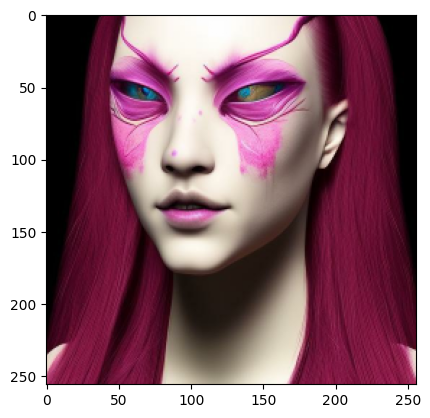

In [83]:
plt.imshow(img)
print(img.shape)


Załadowanie danych

(zebranie ścieżek i etykiet)

In [41]:
def get_paths(tt):
    full_paths=glob.glob(os.path.join(path, tt, "*/*.*"))
    labels=[path.split(os.path.sep)[-2] for path in full_paths]
    return full_paths, labels
train_paths, train_labels=get_paths("train")
test_paths, test_labels=get_paths("test")

In [42]:
print(len(test_paths))

12000


Kodowanie etykiet 

In [46]:
le=LabelEncoder()
le.fit(train_labels)

y_train=le.transform(train_labels)
y_test=le.transform(test_labels)

Dodanie zbioru walidacyjnego

In [48]:
train_paths_x, x_val, train_labels_y, y_val=train_test_split(train_paths, y_train, test_size=0.2, stratify=train_labels, random_state=42)

Przetworzenie obrazów

In [91]:
img_size=(256, 256)

def process_image(file_path, label):
    img=tf.io.read_file(file_path)
    img=tf.image.decode_image(img, channels=3)
    img.set_shape([None, None, 3])
    img=tf.image.resize(img, img_size)
    img=tf.cast(img, tf.float32)/255.0
    return img, label


Tworzenie pipeline

Dane treningowe:

In [92]:
ds_train=tf.data.Dataset.from_tensor_slices((train_paths_x, train_labels_y))
ds_train=ds_train.map(process_image, num_parallel_calls= tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

Dane do walidacji:

In [93]:
ds_val=tf.data.Dataset.from_tensor_slices((x_val, y_val))
ds_val=ds_val.map(process_image, num_parallel_calls= tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

Dane testowe:

In [94]:
ds_test=tf.data.Dataset.from_tensor_slices((test_paths, y_test))
ds_test=ds_test.map(process_image, num_parallel_calls= tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)